# 1-ое задание

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import pandas, seaborn, math, numpy, random

csv_table = pandas.read_csv('agaricus-lepiota.data', usecols=[0,1,2,3,4,5],header=None)
csv_table.rename(columns={0:'class', 1: 'cap-shape', 2: 'cap-surface', 3: 'cap-color', 4:'bruises?', 5: 'odor'}, inplace=True)
df = pandas.DataFrame(csv_table)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor
0,p,x,s,n,t,p
1,e,x,s,y,t,a
2,e,b,s,w,t,l
3,p,x,y,w,t,p
4,e,x,s,g,f,n


In [ ]:
# распределение значений категориальных признаков по классам

df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

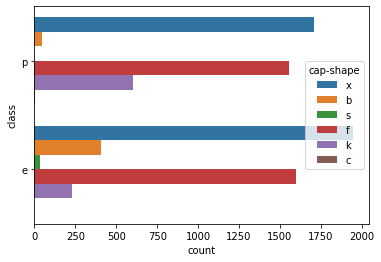

In [ ]:
## признак cap-shape

seaborn.countplot(y='class', hue='cap-shape', data=df)

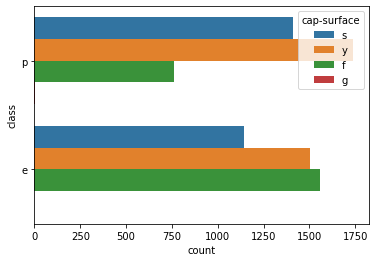

In [ ]:
## признак cap-surface

seaborn.countplot(y='class', hue='cap-surface', data=df)

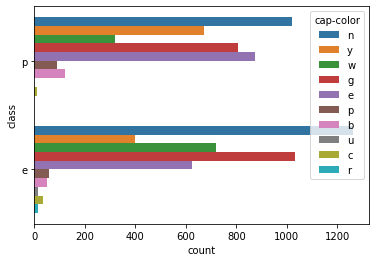

In [ ]:
## признак cap-color

seaborn.countplot(y='class', hue='cap-color', data=df)

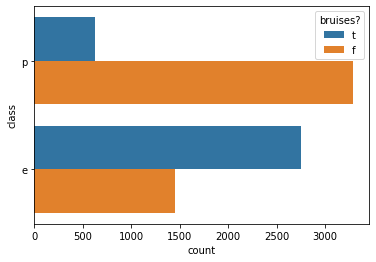

In [ ]:
## признак bruises?

seaborn.countplot(y='class', hue='bruises?', data=df)

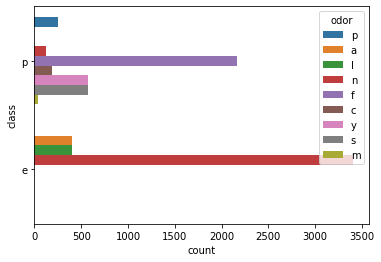

In [ ]:
## признак odor

seaborn.countplot(y='class', hue='odor', data=df)

In [ ]:
# разделение на обучающую и тестовую выборки

train, test = train_test_split(df, test_size=0.2)
train['class'].value_counts() # распределение классов в тренировочной выборке

e    3383
p    3116
Name: class, dtype: int64

In [ ]:
test['class'].value_counts() # распределение классов в тестовой выборке

e    825
p    800
Name: class, dtype: int64

**Выводы по первому заданию:** для каждого класса распределение значений категориальных признаков неравномерное, например, для признака odor в экземплярах класса e вообще отсутствуют некоторые значения, которые есть для того же признака в экземплярах класса p. Наиболее равномерное распределение значений по классам - у признака cap-surface.

# 2-ое задание

In [ ]:
# частоты
total_samples_class_1 = train.loc[train['class'] == 'e']
total_samples_class_2 = train.loc[train['class'] == 'p']
def class_features_values_frequences(class_data):
  frequences = []
  for column in class_data.drop(columns=['class']):
    numbers = class_data[column].value_counts()
    frequences.append(numbers)
  return frequences
class_1_stats = class_features_values_frequences(total_samples_class_1)
class_2_stats = class_features_values_frequences(total_samples_class_2)
#значения переменных, характерных для каждого класса
classes_preferences = []
preferences_1 = []
preferences_2 = []
for feature_class_1, feature_class_2 in zip(class_1_stats,class_2_stats):
  values_class_1 = feature_class_1.index.tolist()
  values_class_2 = feature_class_2.index.tolist()
  frequent_values_class_1 = list(set(values_class_1) - set(values_class_2))
  frequent_values_class_2 = list(set(values_class_2) - set(values_class_1))
  preferences_1.append(frequent_values_class_1)
  preferences_2.append(frequent_values_class_2)
  for v1 in frequent_values_class_1:
    values_class_1.remove(v1)
  for v2 in frequent_values_class_2:
    values_class_2.remove(v2)
  for variable_value in values_class_1:
    if feature_class_1[variable_value] > feature_class_2[variable_value]:
      frequent_values_class_1.append(variable_value)
    else:
      frequent_values_class_2.append(variable_value)
  classes_preferences.append([frequent_values_class_1, frequent_values_class_2])
# решающая функция
def freq_classifier(sample_value,class_preference,index):
  points = []
  if sample_value[index] in class_preference[0]:
    return 'e'
  if sample_value[index] in class_preference[1]:
    return 'p'
# классификация
X_test = test.drop(columns=['class']).values.tolist()
Y_test = test['class'].values.tolist()

X_train = train.drop(columns=['class']).values.tolist()
Y_train = train['class'].values.tolist()

results_cap_shape = []
results_cap_surface = []
results_cap_color = []
results_bruises = []
results_odor = []
for sample in X_test:
  class_label_cap_shape = freq_classifier(sample,classes_preferences[0],0) ## 0: 'cap-shape', 1: 'cap-surface', 2: 'cap-color', 3:'bruises?', 4: 'odor'
  class_label_cap_surface = freq_classifier(sample,classes_preferences[1],1)
  class_label_cap_color = freq_classifier(sample,classes_preferences[2],2)
  class_label_bruises = freq_classifier(sample,classes_preferences[3],3)
  class_label_odor = freq_classifier(sample,classes_preferences[4],4)
  results_cap_shape.append(class_label_cap_shape)
  results_cap_surface.append(class_label_cap_surface)
  results_cap_color.append(class_label_cap_color)
  results_bruises.append(class_label_bruises)
  results_odor.append(class_label_odor)

results_cap_shape_train = []
results_cap_surface_train = []
results_cap_color_train = []
results_bruises_train = []
results_odor_train = []
for sample_train in X_train:
  class_label_cap_shape = freq_classifier(sample_train,classes_preferences[0],0) ## 0: 'cap-shape', 1: 'cap-surface', 2: 'cap-color', 3:'bruises?', 4: 'odor'
  class_label_cap_surface = freq_classifier(sample_train,classes_preferences[1],1)
  class_label_cap_color = freq_classifier(sample_train,classes_preferences[2],2)
  class_label_bruises = freq_classifier(sample_train,classes_preferences[3],3)
  class_label_odor = freq_classifier(sample_train,classes_preferences[4],4)
  results_cap_shape_train.append(class_label_cap_shape)
  results_cap_surface_train.append(class_label_cap_surface)
  results_cap_color_train.append(class_label_cap_color)
  results_bruises_train.append(class_label_bruises)
  results_odor_train.append(class_label_odor)

# подсчет результатов
def accuracy_computing(results,answers_data):
  mistakes = 0
  for user_answer, ethalon_answer in zip(results,answers_data):
    if user_answer != ethalon_answer:
      mistakes += 1
  accuracy = (len(answers_data)-mistakes)/len(answers_data)
  return accuracy

print('Accuracy on test data:')
print('Algorithm accuracy with cap-shape attribute : ', accuracy_computing(results_cap_shape,Y_test))
print('Algorithm accuracy with cap-surface attribute : ', accuracy_computing(results_cap_surface,Y_test))
print('Algorithm accuracy with cap-color attribute : ', accuracy_computing(results_cap_color,Y_test))
print('Algorithm accuracy with bruises? attribute : ', accuracy_computing(results_bruises,Y_test))
print('Algorithm accuracy with odor attribute : ', accuracy_computing(results_odor,Y_test))
print('----------------------------------------')
print('Accuracy on train data:')
print('Algorithm accuracy with cap-shape attribute : ', accuracy_computing(results_cap_shape_train, Y_train))
print('Algorithm accuracy with cap-surface attribute : ', accuracy_computing(results_cap_surface_train, Y_train))
print('Algorithm accuracy with cap-color attribute : ', accuracy_computing(results_cap_color_train, Y_train))
print('Algorithm accuracy with bruises? attribute : ', accuracy_computing(results_bruises_train, Y_train))
print('Algorithm accuracy with odor attribute : ', accuracy_computing(results_odor_train, Y_train))

Accuracy on test data:
Algorithm accuracy with cap-shape attribute :  0.5716923076923077
Algorithm accuracy with cap-surface attribute :  0.5864615384615385
Algorithm accuracy with cap-color attribute :  0.5913846153846154
Algorithm accuracy with bruises? attribute :  0.7507692307692307
Algorithm accuracy with odor attribute :  0.9846153846153847
----------------------------------------
Accuracy on train data:
Algorithm accuracy with cap-shape attribute :  0.5623942144945376
Algorithm accuracy with cap-surface attribute :  0.5790121557162641
Algorithm accuracy with cap-color attribute :  0.5962455762424989
Algorithm accuracy with bruises? attribute :  0.7422680412371134
Algorithm accuracy with odor attribute :  0.9853823665179259


**Выводы по второму заданию:**наиболее высокую точность алгоритм показывает при использовании переменных odor и bruises?

# 3-е задание

In [ ]:
# one-hot encoding
X_train_ohe = pandas.get_dummies(train.drop(columns='class'))
Y_train = train['class']
X_test_ohe = pandas.get_dummies(test.drop(columns='class'))
Y_test = test['class']

# classifier
classifier = BernoulliNB()
classifier.fit(X_train_ohe,Y_train)
accuracy = classifier.score(X_test_ohe,Y_test)
print('Bernoulli NB accuracy:',accuracy)

Bernoulli NB accuracy: 0.9876923076923076


# 4-ое задание



In [ ]:
P_class_1 = (train['class'].value_counts()['e'])/len(train['class']) # P(w_1)
P_class_2 = (train['class'].value_counts()['p'])/len(train['class']) # P(w_2)
X_train_ohe = pandas.get_dummies(train.drop(columns='class'))
print(X_train_ohe)
X_test_ohe = pandas.get_dummies(test.drop(columns='class'))
print(X_test_ohe)
Y_train = train['class']
Y_test = test['class']

      cap-shape_b  cap-shape_c  cap-shape_f  ...  odor_p  odor_s  odor_y
5386            0            0            0  ...       0       0       0
3578            0            0            1  ...       0       0       0
6056            0            0            1  ...       0       0       0
5560            0            0            0  ...       0       0       0
6501            0            0            0  ...       0       1       0
...           ...          ...          ...  ...     ...     ...     ...
3775            0            0            0  ...       0       0       0
2035            0            0            0  ...       0       0       0
680             0            0            0  ...       0       0       0
684             0            0            0  ...       0       0       0
6788            0            0            1  ...       0       0       0

[6499 rows x 31 columns]
      cap-shape_b  cap-shape_c  cap-shape_f  ...  odor_p  odor_s  odor_y
2288            0        

In [ ]:
b_0 = math.log(P_class_1/P_class_2)
rows,columns = X_train_ohe.shape
b = numpy.zeros(columns)
for j in range(columns):
  counter_class_p = 0
  counter_class_e = 0
  for i in range(rows):
    if(X_train_ohe.iloc[i][j] == 1):
      if(Y_train.iloc[i] == 'p'):
        counter_class_p += 1
      else:
        counter_class_e += 1
  p = (counter_class_p +1) / ((train['class'].value_counts()['p']+2))
  e = (counter_class_e +1) / ((train['class'].value_counts()['e']+2))
  b[j] = math.log((p * (1 - e)) / ( e * (1 - p)))
  b_0 += math.log((1 - p) / (1 - e))
b_0

0.12284017471674813

In [ ]:
b

array([-2.00420028,  1.46944473,  0.06007508,  1.13128648, -3.32761661,
       -0.0965411 , -0.90766011,  1.46944473,  0.38333841,  0.40235236,
        0.92762832, -0.7246104 ,  0.49661357, -0.21030555, -0.20956369,
        0.56792262, -2.63000846, -2.48631432, -0.81476119,  0.66683491,
        2.27885028, -2.27885028, -5.79202772,  5.19646421,  8.32113683,
       -5.82253717,  3.49273219, -4.84029008,  5.48844344,  6.38034084,
        6.35732689])

In [ ]:
test_rows, test_columns = X_test_ohe.shape
results = numpy.empty(test_rows, dtype = object)
for i in range(test_rows):
  l_0=b_0
  for j in range(test_columns):
    l_0 += X_test_ohe.iloc[i][j]*b[j] # l_0
  if (l_0>0):
    results[i] = 'p'
  elif (l_0<0):
    results[i] = 'e'
  else:
    results[i] = random.choice(['p','e'])


In [ ]:
# подсчет результатов
def accuracy_computing(results,answers_data):
  mistakes = 0
  for user_answer, ethalon_answer in zip(results,answers_data):
    if user_answer != ethalon_answer:
      mistakes += 1
  accuracy = (len(answers_data)-mistakes)/len(answers_data)
  return accuracy

print('NBC accuracy: ', accuracy_computing(results,Y_test))

NBC accuracy:  0.9870769230769231


**Выводы по четвертому заданию:** точность алгоритма получилась сопоставимой с точностью при библиотечной реализации, хотя возможно она была бы выше при использовании только наиболее значимых переменных.